# 당뇨병 환자의 1년 후 병의 진전된 정도 예측 모델

## 1. Load data

In [23]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [24]:
print(diabetes['data'].shape, diabetes['target'].shape)

(442, 10) (442,)


In [25]:
diabetes['data'][:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [26]:
diabetes['target'][:3]

array([151.,  75., 141.])

## 2. Data Visualization

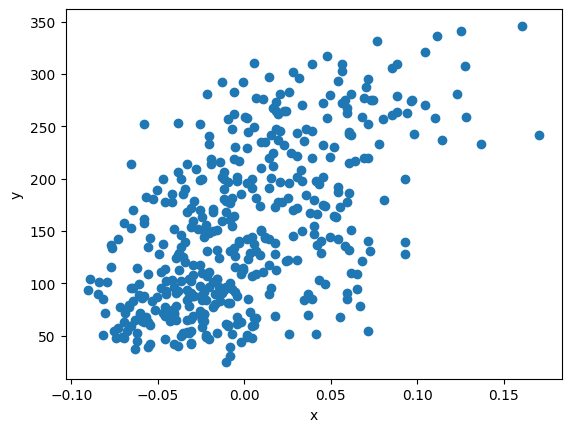

In [27]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3. Prepare to Training set

In [28]:
x = diabetes.data[:, 2]
y = diabetes.target

## 4. Model

In [29]:
w = 1.0
b = 1.0
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [30]:
print(y[0])

151.0


In [31]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


In [32]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [33]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [34]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186833
1.0


In [35]:
b_new = b + 1
print(b_new)

2.0


In [36]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [37]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [38]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985616 99.4093556453094


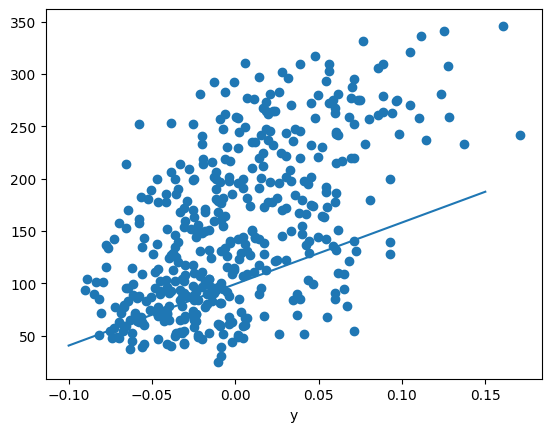

In [39]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.xlabel('y')
plt.show()